In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from FS.pso import jfs   # change this to switch algorithm 

In [4]:
from scipy.io import arff
arff_file = arff.loadarff('archive/JM1.arff')

In [5]:
# load data
data  = pd.DataFrame(arff_file[0])

In [6]:
data.head()

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,...,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,label
0,1.0,7.0,0.0,0.0,4.0,3.0,1.0,11.0,25.05,11.20,...,59.0,0.09,174.56,280.54,28.0,31.0,15.0,12.0,14.0,b'N'
1,5.0,37.0,0.0,6.0,19.0,16.0,10.0,85.0,81.19,27.41,...,351.0,0.04,3388.22,2225.29,147.0,204.0,59.0,22.0,98.0,b'N'
2,2.0,1.0,0.0,0.0,1.0,1.0,1.0,10.0,56.44,2.83,...,37.0,0.35,25.17,159.91,17.0,20.0,15.0,5.0,14.0,b'Y'
3,16.0,1.0,0.0,0.0,1.0,1.0,1.0,52.0,168.57,16.97,...,450.0,0.06,2697.42,2860.90,198.0,252.0,70.0,12.0,70.0,b'Y'
4,0.0,7.0,0.0,0.0,4.0,2.0,3.0,9.0,14.32,7.71,...,26.0,0.13,47.33,110.45,9.0,17.0,7.0,12.0,12.0,b'N'


In [7]:
# number of attack labels 
data['label'].value_counts()

b'N'    6110
b'Y'    1672
Name: label, dtype: int64

In [8]:
def change_label(df):
  df.label.replace([b'N'],'NO',inplace=True)
  df.label.replace([b'Y'],'YES',inplace=True)

In [9]:
change_label(data)

In [10]:
# distribution of attack classes
data.label.value_counts()

NO     6110
YES    1672
Name: label, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7782 entries, 0 to 7781
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOC_BLANK              7782 non-null   float64
 1   BRANCH_COUNT           7782 non-null   float64
 2   LOC_CODE_AND_COMMENT   7782 non-null   float64
 3   LOC_COMMENTS           7782 non-null   float64
 4   CYCLOMATIC_COMPLEXITY  7782 non-null   float64
 5   DESIGN_COMPLEXITY      7782 non-null   float64
 6   ESSENTIAL_COMPLEXITY   7782 non-null   float64
 7   LOC_EXECUTABLE         7782 non-null   float64
 8   HALSTEAD_CONTENT       7782 non-null   float64
 9   HALSTEAD_DIFFICULTY    7782 non-null   float64
 10  HALSTEAD_EFFORT        7782 non-null   float64
 11  HALSTEAD_ERROR_EST     7782 non-null   float64
 12  HALSTEAD_LENGTH        7782 non-null   float64
 13  HALSTEAD_LEVEL         7782 non-null   float64
 14  HALSTEAD_PROG_TIME     7782 non-null   float64
 15  HALS

In [12]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Defective']= label_encoder.fit_transform(data['label'])

data['Defective'].unique()

array([0, 1])

In [13]:
del data['label']

In [14]:
X = data.drop(["Defective"],axis =1)
y = data["Defective"]

In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_oversampled, y_oversampled = sm.fit_resample(X, y)

In [16]:
X_smt = pd.DataFrame(X_oversampled, columns=X.columns)

In [17]:
X_smt.shape

(12220, 21)

In [18]:
y_oversampled.shape

(12220,)

In [19]:
X = X_smt.values

In [20]:
y = y_oversampled.values

In [21]:
feat  = np.asarray(X)
label = np.asarray(y)

In [22]:
# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, stratify=label)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

In [23]:
# parameter
k    = 5     # k-value
N    = 5    # number of particles
T    = 5   # maximum number of iterations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

Iteration: 1
Best (PSO): 0.2677114020731043
Iteration: 2
Best (PSO): 0.2677114020731043
Iteration: 3
Best (PSO): 0.2677114020731043
Iteration: 4
Best (PSO): 0.2657571506507677
Iteration: 5
Best (PSO): 0.2657571506507677


In [24]:
data.columns

Index(['LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS',
       'CYCLOMATIC_COMPLEXITY', 'DESIGN_COMPLEXITY', 'ESSENTIAL_COMPLEXITY',
       'LOC_EXECUTABLE', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY',
       'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH',
       'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME',
       'NUM_OPERANDS', 'NUM_OPERATORS', 'NUM_UNIQUE_OPERANDS',
       'NUM_UNIQUE_OPERATORS', 'LOC_TOTAL', 'Defective'],
      dtype='object')

In [25]:
sf

array([ 2,  3,  4, 12, 14, 18, 19, 20])

In [26]:
# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)

In [27]:
x_train   = xtrain[:, sf]

In [28]:
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

In [29]:
# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

Feature Size: 8


In [30]:
X_fea = pd.DataFrame(x_train)
y_fea = pd.DataFrame(y_train)

In [31]:
result = pd.concat([X_fea, y_fea], axis=1, join='inner')

In [32]:
result.to_csv('jm1_processed.csv')

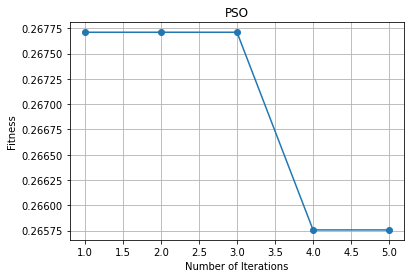

In [33]:
# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('PSO')
ax.grid()
plt.show()

In [34]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
auc = []
spec = []
sens = []


#function to call for storing the results
def storeResults(model, a,b,c,d,e,f,g):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    auc.append(round(e,3))
    spec.append(round(f,3))
    sens.append(round(g,3))

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import specificity_score,sensitivity_score

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred    = rf.predict(x_valid)

rf_acc = accuracy_score(y_pred, y_valid)
rf_prec = precision_score(y_pred, y_valid,average='weighted')
rf_rec = recall_score(y_pred, y_valid,average='weighted')
rf_f1 = f1_score(y_pred, y_valid,average='weighted')
rf_auroc = roc_auc_score(y_train, rf.predict_proba(x_train)[:, 1])
rf_spec = specificity_score(y_valid, y_pred, average='weighted')
rf_sens = sensitivity_score(y_valid, y_pred, average='weighted')

In [37]:
storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1,rf_auroc,rf_spec,rf_sens)

# SVM

In [38]:
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(x_train, y_train)

y_pred    = svm.predict(x_valid)

svm_acc = accuracy_score(y_pred, y_valid)
svm_prec = precision_score(y_pred, y_valid,average='weighted')
svm_rec = recall_score(y_pred, y_valid,average='weighted')
svm_f1 = f1_score(y_pred, y_valid,average='weighted')
svm_auroc = roc_auc_score(y_train, svm.predict_proba(x_train)[:, 1])
svm_spec = specificity_score(y_valid, y_pred, average='weighted')
svm_sens = sensitivity_score(y_valid, y_pred, average='weighted')

In [39]:
storeResults('Support Vector Machine',svm_acc,svm_prec,svm_rec,svm_f1,svm_auroc,svm_spec,svm_sens)

# Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
lr = GaussianNB()
lr.fit(x_train, y_train)

y_pred    = lr.predict(x_valid)

lr_acc = accuracy_score(y_pred, y_valid)
lr_prec = precision_score(y_pred, y_valid,average='weighted')
lr_rec = recall_score(y_pred, y_valid,average='weighted')
lr_f1 = f1_score(y_pred, y_valid,average='weighted')
lr_auroc = roc_auc_score(y_train, lr.predict_proba(x_train)[:, 1])
lr_spec = specificity_score(y_valid, y_pred, average='weighted')
lr_sens = sensitivity_score(y_valid, y_pred, average='weighted')

In [41]:
storeResults('NaiveBayes',lr_acc,lr_prec,lr_rec,lr_f1,lr_auroc,lr_spec,lr_sens)

# ANN-MLP

In [42]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1)
mlp.fit(x_train, y_train)

y_pred    = mlp.predict(x_valid)

mlp_acc = accuracy_score(y_pred, y_valid)
mlp_prec = precision_score(y_pred, y_valid,average='weighted')
mlp_rec = recall_score(y_pred, y_valid,average='weighted')
mlp_f1 = f1_score(y_pred, y_valid,average='weighted')
mlp_auroc = roc_auc_score(y_train, mlp.predict_proba(x_train)[:, 1])
mlp_spec = specificity_score(y_valid, y_pred, average='weighted')
mlp_sens = sensitivity_score(y_valid, y_pred, average='weighted')

In [43]:
storeResults('MLP Classifier',mlp_acc,mlp_prec,mlp_rec,mlp_f1,mlp_auroc,mlp_spec,mlp_sens)

# Adaptive Voting Classifier

In [44]:
from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(estimators=[('RF', rf), ('NB', lr), ('ANN', mlp), ('svm', svm)], voting='soft')

clf.fit(x_train, y_train)

y_pred    = clf.predict(x_valid)

vot_acc = accuracy_score(y_pred, y_valid)
vot_prec = precision_score(y_pred, y_valid,average='weighted')
vot_rec = recall_score(y_pred, y_valid,average='weighted')
vot_f1 = f1_score(y_pred, y_valid,average='weighted')
vot_auroc = roc_auc_score(y_train, clf.predict_proba(x_train)[:, 1])
vot_spec = specificity_score(y_valid, y_pred, average='weighted')
vot_sens = sensitivity_score(y_valid, y_pred, average='weighted')

In [45]:
storeResults('Adaptive Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1,vot_auroc,vot_spec,vot_sens)

# Stacking CLassifier

In [46]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

tree = DecisionTreeClassifier(random_state = 0)

estimators = [('rf', rf),('dt', tree)]

eclf1 = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=100))

eclf1.fit(x_train, y_train)

y_pred    = eclf1.predict(x_valid)

stac_acc = (accuracy_score(y_pred, y_valid))
stac_prec = precision_score(y_pred, y_valid,average='weighted')
stac_rec = recall_score(y_pred, y_valid,average='weighted')
stac_f1 = f1_score(y_pred, y_valid,average='weighted')
stac_auroc = roc_auc_score(y_train, eclf1.predict_proba(x_train)[:, 1])
stac_spec = specificity_score(y_valid, y_pred, average='weighted')
stac_sens = sensitivity_score(y_valid, y_pred, average='weighted')

In [48]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1,stac_auroc,stac_spec,stac_sens)

# Comparison

In [49]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score,
                       'AUC Score' : auc,
                       'Specificity' : spec,
                       'Sensitivity' : sens
                        
                      }) 

In [50]:
result

,ML Model,Accuracy,Precision,Recall,F1_score,AUC Score,Specificity,Sensitivity
0,Random Forest,0.840,0.840,0.840,0.840,1.000,0.840,0.840
1,Support Vector Machine,0.588,0.786,0.588,0.633,0.643,0.588,0.588
2,NaiveBayes,0.582,0.825,0.582,0.639,0.624,0.582,0.582
3,MLP Classifier,0.608,0.622,0.608,0.611,0.613,0.608,0.608
4,Adaptive Voting Classifier,0.661,0.735,0.661,0.674,0.851,0.661,0.661
5,Stacking Classifier,0.836,0.837,0.836,0.836,1.000,0.836,0.836


# Graph

In [51]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

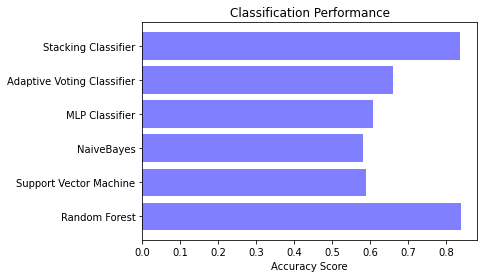

In [52]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

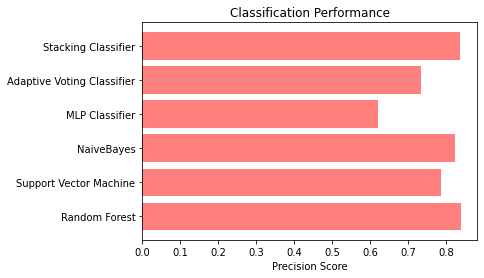

In [53]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

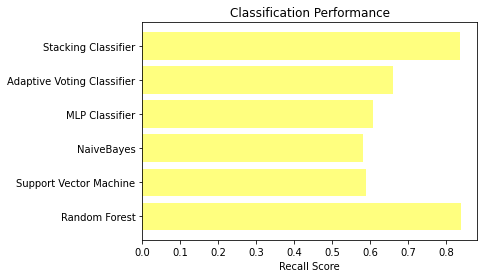

In [54]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

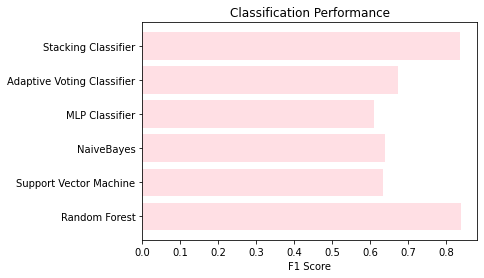

In [55]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# AUC Score

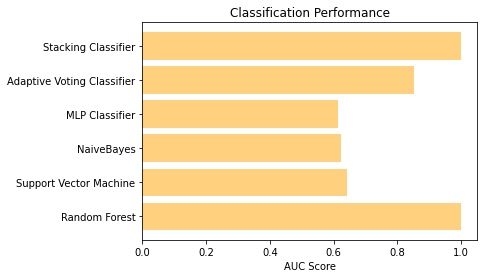

In [56]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, auc, align='center', alpha=0.5,color='orange')
plt2.yticks(y_pos, classifier)
plt2.xlabel('AUC Score')
plt2.title('Classification Performance')
plt2.show()

# Specificity

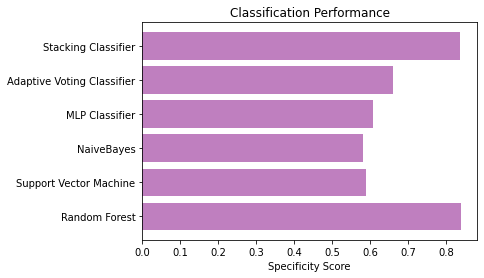

In [57]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, spec, align='center', alpha=0.5,color='purple')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Specificity Score')
plt2.title('Classification Performance')
plt2.show()

# Senseitivity

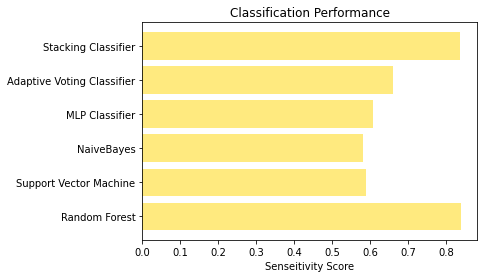

In [58]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, sens, align='center', alpha=0.5,color='gold')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Senseitivity Score')
plt2.title('Classification Performance')
plt2.show()